In [1]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('/home/maitanha/cll_vlm/cll_vlm/ol_cll_logs/describe/cifar100_clip_top3_llava_prompt2.csv')

print(f"Total samples: {len(df)}")
print(f"\nFirst few rows:")
print(df.head(10))


Total samples: 50000

First few rows:
   index     true_label random_label                   super_class  \
0      0         cattle          boy                        people   
1      1       dinosaur      lobster      non-insect_invertebrates   
2      2          apple         girl                        people   
3      3            boy    palm_tree                         trees   
4      4  aquarium_fish         lamp  household_electrical_devices   
5      5      telephone          boy                        people   
6      6          train       lizard                      reptiles   
7      7            cup      hamster                 small_mammals   
8      8          cloud       beetle                       insects   
9      9       elephant      bicycle                    vehicles_1   

                                         vlm_caption predicted  
0                                                NaN        CL  
1  [INST] \nWhat is the main object in this image...   UNKNOW

In [2]:
# Filter samples predicted as CL
cl_samples = df[df['predicted'] == 'CL'].copy()

print(f"Total samples predicted as CL: {len(cl_samples)}")
print(f"\nFirst few CL samples:")
print(cl_samples[['index', 'true_label', 'random_label', 'predicted']].head(10))


Total samples predicted as CL: 7582

First few CL samples:
    index   true_label random_label predicted
0       0       cattle          boy        CL
11     11  willow_tree        woman        CL
16     16      bicycle          bee        CL
24     24    pine_tree       forest        CL
28     28      leopard      leopard        CL
29     29       possum         seal        CL
39     39        table         pear        CL
40     40        snake       beaver        CL
41     41      lobster        woman        CL
55     55          bee     squirrel        CL


In [3]:
# Check how many CL predictions are correct (true_label != random_label)
cl_samples['is_correct'] = cl_samples['true_label'] != cl_samples['random_label']

correct_cl = cl_samples[cl_samples['is_correct'] == True]
incorrect_cl = cl_samples[cl_samples['is_correct'] == False]

print(f"CL predictions that are CORRECT (true_label != random_label): {len(correct_cl)}")
print(f"CL predictions that are INCORRECT (true_label == random_label): {len(incorrect_cl)}")
print(f"\nAccuracy of CL predictions: {len(correct_cl) / len(cl_samples) * 100:.2f}%")


CL predictions that are CORRECT (true_label != random_label): 7203
CL predictions that are INCORRECT (true_label == random_label): 379

Accuracy of CL predictions: 95.00%


In [4]:
# Show some examples of correct CL predictions
print("Examples of CORRECT CL predictions (true_label != random_label):")
print(correct_cl[['index', 'true_label', 'random_label', 'predicted']].head(20))


Examples of CORRECT CL predictions (true_label != random_label):
     index   true_label random_label predicted
0        0       cattle          boy        CL
11      11  willow_tree        woman        CL
16      16      bicycle          bee        CL
24      24    pine_tree       forest        CL
29      29       possum         seal        CL
39      39        table         pear        CL
40      40        snake       beaver        CL
41      41      lobster        woman        CL
55      55          bee     squirrel        CL
56      56   maple_tree          man        CL
57      57        chair        otter        CL
71      71        mouse      dolphin        CL
72      72        camel         seal        CL
74      74      hamster        skunk        CL
89      89  caterpillar    butterfly        CL
92      92         girl        whale        CL
111    111       possum      hamster        CL
114    114          boy      hamster        CL
117    117     kangaroo    butterfly      

In [5]:
# Show some examples of incorrect CL predictions (where true_label == random_label)
print("Examples of INCORRECT CL predictions (true_label == random_label):")
print(incorrect_cl[['index', 'true_label', 'random_label', 'predicted']].head(20))


Examples of INCORRECT CL predictions (true_label == random_label):
      index  true_label random_label predicted
28       28     leopard      leopard        CL
65       65        girl         girl        CL
383     383        bear         bear        CL
507     507   butterfly    butterfly        CL
511     511       tulip        tulip        CL
513     513        pear         pear        CL
551     551    keyboard     keyboard        CL
583     583         sea          sea        CL
630     630     tractor      tractor        CL
642     642     lobster      lobster        CL
726     726       camel        camel        CL
874     874      orange       orange        CL
997     997       plain        plain        CL
1023   1023     bicycle      bicycle        CL
1489   1489        bowl         bowl        CL
1552   1552       plate        plate        CL
1626   1626       apple        apple        CL
2106   2106       woman        woman        CL
2334   2334  television   television    

In [6]:
# Summary statistics
print("=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Total samples in dataset: {len(df)}")
print(f"Samples predicted as CL: {len(cl_samples)}")
print(f"  - Correct CL predictions (true_label != random_label): {len(correct_cl)}")
print(f"  - Incorrect CL predictions (true_label == random_label): {len(incorrect_cl)}")
print(f"\nCL Prediction Accuracy: {len(correct_cl) / len(cl_samples) * 100:.2f}%")
print(f"Percentage of CL predictions out of total: {len(cl_samples) / len(df) * 100:.2f}%")


SUMMARY
Total samples in dataset: 50000
Samples predicted as CL: 7582
  - Correct CL predictions (true_label != random_label): 7203
  - Incorrect CL predictions (true_label == random_label): 379

CL Prediction Accuracy: 95.00%
Percentage of CL predictions out of total: 15.16%


In [7]:
# 1. Check samples predicted as OL and their correctness (true_label == random_label)
ol_samples = df[df['predicted'] == 'OL'].copy()
ol_samples['is_correct'] = ol_samples['true_label'] == ol_samples['random_label']
correct_ol = ol_samples[ol_samples['is_correct'] == True]
incorrect_ol = ol_samples[ol_samples['is_correct'] == False]

print(f"Total samples predicted as OL: {len(ol_samples)}")
print(f"  - Correct OL predictions (true_label == random_label): {len(correct_ol)}")
print(f"  - Incorrect OL predictions (true_label != random_label): {len(incorrect_ol)}")
if len(ol_samples) > 0:
    print(f"OL Prediction Accuracy: {len(correct_ol) / len(ol_samples) * 100:.2f}%")
else:
    print("No OL predictions found.")

# 2. For predicted = UNKNOWN, check if caption contains true_label
unknown_samples = df[df['predicted'] == 'UNKNOWN'].copy()
unknown_samples['caption_has_true_label'] = unknown_samples.apply(
    lambda row: isinstance(row['vlm_caption'], str) and str(row['true_label']).lower() in row['vlm_caption'].lower(), axis=1)
caption_match = unknown_samples[unknown_samples['caption_has_true_label'] == True]

print(f"Total samples predicted as UNKNOWN: {len(unknown_samples)}")
print(f"  - UNKNOWN samples where caption contains true_label: {len(caption_match)}")
if len(unknown_samples) > 0:
    print(f"Percentage: {len(caption_match) / len(unknown_samples) * 100:.2f}%")


Total samples predicted as OL: 52
  - Correct OL predictions (true_label == random_label): 42
  - Incorrect OL predictions (true_label != random_label): 10
OL Prediction Accuracy: 80.77%
Total samples predicted as UNKNOWN: 42077
  - UNKNOWN samples where caption contains true_label: 17452
Percentage: 41.48%


# analyze log: 
- Stage 1: CLIP top3 coarse label -NO-> CL
- If YES -> Stage 2
- Stage 2: Ask LLaVA + Pos > Neg CLIP -> OL
- Else UNKOWN

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)

csv_path = "/home/maitanha/cll_vlm/cll_vlm/ol_cll_logs/yes-no/cifar100_clip_top3_llava_yesno_posneg.csv"  # đổi path
df = pd.read_csv(csv_path)

df["gt_relation"] = np.where(
    df["true_label"] == df["random_label"],
    "OL",
    "CL"
)


In [23]:
summary = []

for label in ["CL", "OL", "UNKNOWN"]:
    sub = df[df["predicted"] == label]
    total = len(sub)
    if total == 0:
        summary.append([label, 0, 0, 0, np.nan])
        continue

    correct = (
        (sub["gt_relation"] == label).sum()
        if label in ["CL", "OL"]
        else np.nan
    )

    precision = correct / total if label in ["CL", "OL"] else np.nan

    summary.append([
        label,
        total,
        (sub["gt_relation"] == "CL").sum(),
        (sub["gt_relation"] == "OL").sum(),
        precision
    ])

summary_df = pd.DataFrame(
    summary,
    columns=[
        "predicted",
        "count",
        "true_CL",
        "true_OL",
        "precision_(if_applicable)"
    ]
)

summary_df


,predicted,count,true_CL,true_OL,precision_(if_applicable)
0,CL,42398,42271,127,0.997005
1,OL,834,569,265,0.317746
2,UNKNOWN,6768,6658,110,NaN


In [24]:
# WRONG OL = predicted OL but actually CL
wrong_ol = df[
    (df["predicted"] == "OL") &
    (df["gt_relation"] == "CL")
].copy()

correct_ol = df[
    (df["predicted"] == "OL") &
    (df["gt_relation"] == "OL")
].copy()

print(f"Wrong OL count: {len(wrong_ol)}")
print(f"Correct OL count: {len(correct_ol)}")

wrong_ol["random_label"].value_counts().head(15)

pd.crosstab(
    wrong_ol["true_coarse"],
    wrong_ol["random_coarse"]
).sort_values(by=wrong_ol["random_coarse"].unique().tolist(), ascending=False)

Wrong OL count: 569
Correct OL count: 265


random_coarse,aquatic_mammals,fish,flowers,food_containers,fruit_and_vegetables,household_electrical_devices,household_furniture,insects,large_carnivores,large_man-made_outdoor_things,large_natural_outdoor_scenes,large_omnivores_and_herbivores,medium_mammals,non-insect_invertebrates,people,reptiles,small_mammals,trees,vehicles_1,vehicles_2
true_coarse,,,,,,,,,,,,,,,,,,,,
trees,0,0,1,0,0,0,0,2,0,0,26,0,0,0,0,0,0,22,0,0
large_natural_outdoor_scenes,0,3,2,0,0,0,0,2,0,0,22,0,0,0,0,0,0,5,0,0
large_man-made_outdoor_things,0,0,0,0,0,0,0,0,0,3,14,0,0,0,1,0,0,2,0,0
vehicles_1,0,0,0,0,0,0,1,1,0,1,7,0,0,0,1,0,0,0,2,5
vehicles_2,0,0,0,0,0,0,0,4,0,0,5,0,0,0,0,0,0,0,3,2
large_omnivores_and_herbivores,0,0,0,0,0,0,0,0,0,0,4,3,1,0,3,0,0,0,0,0
large_carnivores,1,0,0,0,0,0,0,1,11,0,3,0,10,0,0,0,0,1,0,0
aquatic_mammals,8,12,0,0,0,0,0,0,0,0,3,1,3,0,0,0,11,0,0,0
people,0,0,0,0,0,0,1,0,0,0,2,0,0,0,20,0,0,0,0,0


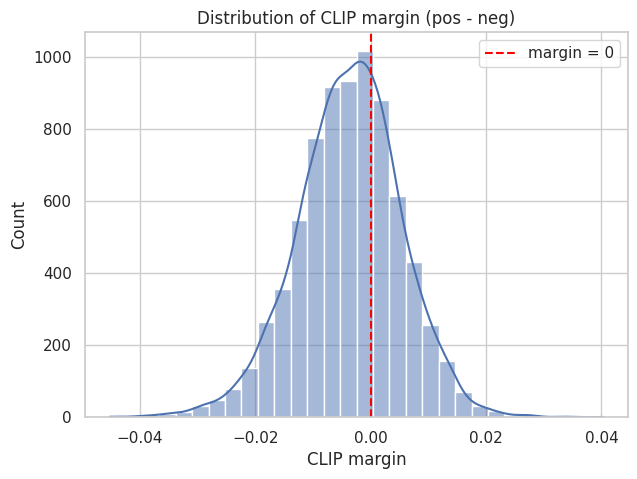

In [17]:
df_clip = df.dropna(subset=["clip_pos", "clip_neg"]).copy()
df_clip["clip_margin"] = df_clip["clip_pos"] - df_clip["clip_neg"]

plt.figure()
sns.histplot(df_clip["clip_margin"], bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--", label="margin = 0")
plt.title("Distribution of CLIP margin (pos - neg)")
plt.xlabel("CLIP margin")
plt.legend()
plt.show()

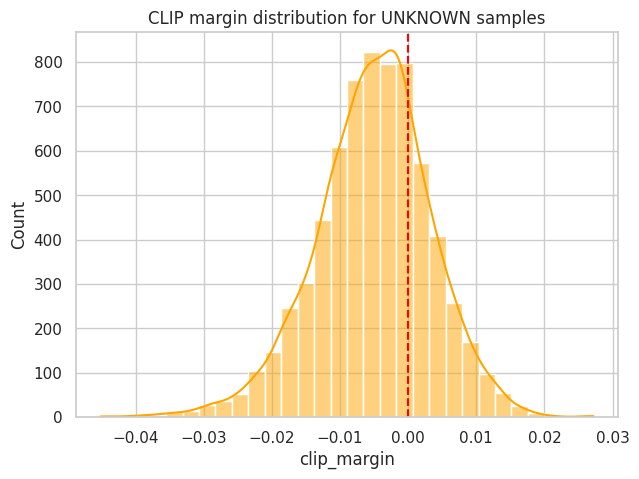

In [20]:
plt.figure()
sns.histplot(
    df_clip[df_clip["predicted"] == "UNKNOWN"]["clip_margin"],
    bins=30,
    kde=True,
    color="orange"
)
plt.axvline(0, color="red", linestyle="--")
plt.title("CLIP margin distribution for UNKNOWN samples")
plt.show()
